## Stigler Diet Problem: Starter Code

In [1]:
using Pkg
Pkg.add("CSV")
Pkg.add("DataFrames")
Pkg.add("NamedArrays")
Pkg.add("LinearAlgebra")

    Updating registry at `C:\Users\16084\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\16084\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\16084\.julia\environments\v1.8\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\16084\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\16084\.julia\environments\v1.8\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\16084\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\16084\.julia\environments\v1.8\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\16084\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\16084\.julia\environments\v1.8\Manifest.toml`


In [2]:
#Question 1

project1=3
project1_worker=8
x=project1_worker/project1

project2=4
project2_worker=10
y=project2_worker/project2

project3=2
project3_worker=12
z=project3_worker/project3

if (x>=6 || y>=6 || z>=6)
    return false
elseif (x+y+z)>8
    return false
else
    return true
end

false

In [3]:
# Therefore, these project can not be completed in these months.

In [4]:
# STARTER CODE FOR STIGLER'S DIET PROBLEM

using NamedArrays, CSV, DataFrames

raw = CSV.read("stigler.csv", DataFrame);
(m,n) = size(raw)

n_nutrients = 2:n      # columns containing nutrients
n_foods = 3:m          # rows containing food names


foods = raw[2:end,1]
nutrients = [string(names(raw)[i]) for i=2:length(names(raw))]

lower = Dict( zip(nutrients,raw[1,n_nutrients]) )

dataraw = Matrix(values(raw[2:end,2:end]))
data = NamedArray(dataraw,(foods,nutrients),("foods","nutrients"))
                
        
println("Foods:\n")
for i in foods
    println(i)
end


println("\n\nNutrient Lower Bounds:\n")
for j in nutrients
    println(j," at least: ",lower[j])
end

Foods:

Wheat Flour (Enriched)
Macaroni
Wheat Cereal (Enriched)
Corn Flakes
Corn Meal
Hominy Grits
Rice
Rolled Oats
White Bread (Enriched)
Whole Wheat Bread
Rye Bread
Pound Cake
Soda Crackers
Milk
Evaporated Milk (can)
Butter
Oleomargarine
Eggs
Cheese (Cheddar)
Cream
Peanut Butter
Mayonnaise
Crisco
Lard
Sirloin Steak
Round Steak
Rib Roast
Chuck Roast
Plate
Liver (Beef)
Leg of Lamb
Lamb Chops (Rib)
Pork Chops
Pork Loin Roast
Bacon
Ham, smoked
Salt Pork
Roasting Chicken
Veal Cutlets
Salmon, Pink (can)
Apples
Bananas
Lemons
Oranges
Green Beans
Cabbage
Carrots
Celery
Lettuce
Onions
Potatoes
Spinach
Sweet Potatoes
Peaches (can)
Pears (can)
Pineapple (can)
Asparagus (can)
Green Beans (can)
Pork and Beans (can)
Corn (can)
Peas (can)
Tomatoes (can)
Tomato Soup (can)
Peaches, Dried
Prunes, Dried
Raisins, Dried
Peas, Dried
Lima Beans, Dried
Navy Beans, Dried
Coffee
Tea
Cocoa
Chocolate
Sugar
Corn Syrup
Molasses
Strawberry Preserves


Nutrient Lower Bounds:

Calories (1000) at least: 3.0
Protein (

In [5]:
#=
Question 2 (a)

The decision variables represent the quantity of each food item that needs to be included in the optimal diet.
Xi = quantity of food i.
i>=1, i<=n
n = number of food

The constraints represent the nutritional requirements of the diet, which can be expressed as linear inequalities. 
There are several nutritional requirements, such as a minimum intake of calories, protein, vitamins, etc.
The requirement of calories: sum of limits({i=1}^{n}*Xi)

The objective of the optimization problem is to minimize the cost of the diet, which can be expressed as a linear 
function of the decision variables.
Minimize the total cost of the diet: sum of limits({i=1}^{m}*pi*Xi)

=#

In [6]:
#Question 2 (b)
using JuMP, CSV, DataFrames, HiGHS

data = CSV.read("stigler.csv", DataFrame, header=1)

A = Matrix(data[:, 2:end])
c = data[1, 2:end]

model = Model(HiGHS.Optimizer)

set_silent(model)

@variable(model, x[1:size(A, 1)] >= 0)
@constraint(model, [j=1:size(A, 2)], sum(A[i,j]*x[i] for i=1:size(A,1)) >= c[j])

@objective(model, Min, sum(x))

optimize!(model)

println("Optimal diet:")
for i=1:size(A, 1)
    if value(x[i]) > 0
        println("  ", data[i, 1], ": ", value(x[i]))
    end
end

Optimal diet:
  Wheat Flour (Enriched): 0.02951906167648827
  Liver (Beef): 0.001892557290705264
  Cabbage: 0.01121443524614487
  Spinach: 0.0050076604667252025
  Navy Beans, Dried: 0.06102856352669324


In [7]:
#=
Question 3(a)

r = radius

x >= r + 75
y >= r + 75
600 - x >= r + 75
500 - y >= r + 75
r >= 0

=#

In [8]:
#Question 3 (b)
A = [2/3 1; 3 -1; 0 1; -1 0; 0 -1];
b = [700; 1500; 500; 0; 0]

using JuMP, HiGHS, LinearAlgebra

m = Model(HiGHS.Optimizer)
set_silent(m)
@variable(m, r >= 0)           # radius of the sphere
@variable(m, x[1:2]>=0)           # coordinates of center
for i = 1:size(A,1)
    @constraint(m, A[i,:]'*x + (75+r)*norm(A[i,:]) <= b[i])
end
@objective(m, Max, r)     # maximize radius of the sphere

optimize!(m)
center = value.(x)
radius = value(r)

println("HiGHS LP solver terminated with status ", termination_status(m))
println("The coordinates of the Chebyshev center are: ", center)
println("The largest possible radius is: ", radius)

HiGHS LP solver terminated with status OPTIMAL
The coordinates of the Chebyshev center are: [244.02852679380183, 244.0285267938019]
The largest possible radius is: 169.0285267938019


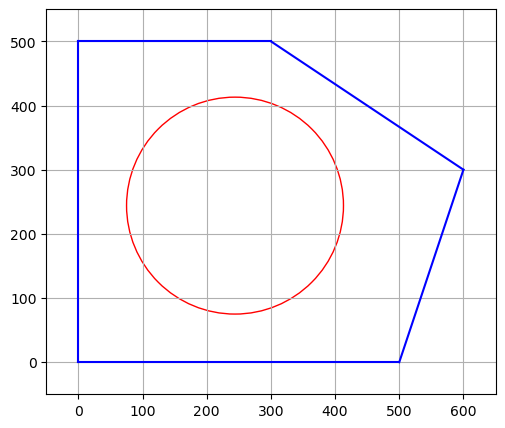

PyObject <matplotlib.patches.Circle object at 0x000002341F4F3B20>

In [14]:
using PyPlot

function plot_site(m)
    plot([0, 0], [0, 500], "b-")
    plot([0, 500], [0, 0], "b-")
    plot([500, 600], [0, 300], "b-")
    plot([300, 600], [500, 300], "b-")
    plot([0, 300], [500, 500], "b-")
    axis("image")
    axis([-0.5, 6.5, -0.5, 5.5]*100)
    grid()
end

figure(figsize=(6, 5))
plot_site(1)
circle = plt.Circle((244.02852679380183, 244.0285267938019), radius = 169.0285267938019, fill=false, color = "red")
plt.gca().add_patch(circle)